In [1]:
from _generate_viz_data import _get_embeddings

import seaborn as sns
import pandas as pd

In [2]:
v0 = _get_embeddings("_io/embeddings-v5.zip", history=True)

rares = v0

n_embeddings = 401


In [3]:
from typing import Dict, Any
from copy import deepcopy

mwell = deepcopy(rares)
# for m in mwell:
#     meta = eval(f"dict({_meta})")
#     m["meta"].update(meta)
    
   

In [4]:
# well = list(sorted(mwell, key=lambda m: m["meta"]["n_top"]))
# for k, m in enumerate(mwell):
#     if m["meta"]["shuffle_seed"] is not None:
#         assert m["meta"]["meta__alg"] is None
#         mwell[k]["meta"]["meta__alg"] = "random"
out = deepcopy(mwell)

In [5]:
{o["meta"]["sampling"] for o in out}

{'next', 'random', 'salmon', 'salmon-tste'}

In [6]:
out[0]["meta"]

{'len_X_train': 450,
 'len_X_test': 60000,
 'n_train': 450,
 'n_test': 60000,
 'n': 90,
 'd': 2,
 'num_ans': 450,
 'sampling': 'salmon-tste',
 'shuffle_seed': None,
 'noise_model': 'CKL',
 'est__random_state': 701,
 'est__max_epochs': 4000000,
 'est__noise_model': 'CKL',
 'ident_k': 0,
 'est__module__mu': 0.05,
 'est__verbose': 40000,
 'meta__alg': 'TSTE',
 'meta__vary': 'search',
 'meta__fname': 'salmon/io/2021-05-26-search/TSTE-n_search=100-1_responses.csv.zip'}

In [7]:
# out[0]["history"]

In [8]:
def _get_meta(x: str) -> str:
    fname = x.split("/")[-1]
    y = fname.replace("-1_responses.csv.zip", "")
    return y

_get_meta("salmon/io/2021-05-26-search/TSTE-n_search=100-1_responses.csv.zip")

'TSTE-n_search=100'

In [9]:
d = 2
nm = "CKL"

# show = [o for o in out if o["meta"]["noise_model"] == nm and o["meta"]["d"] == d]
show = [o for o in out]# if o["meta"]["d"] == d]

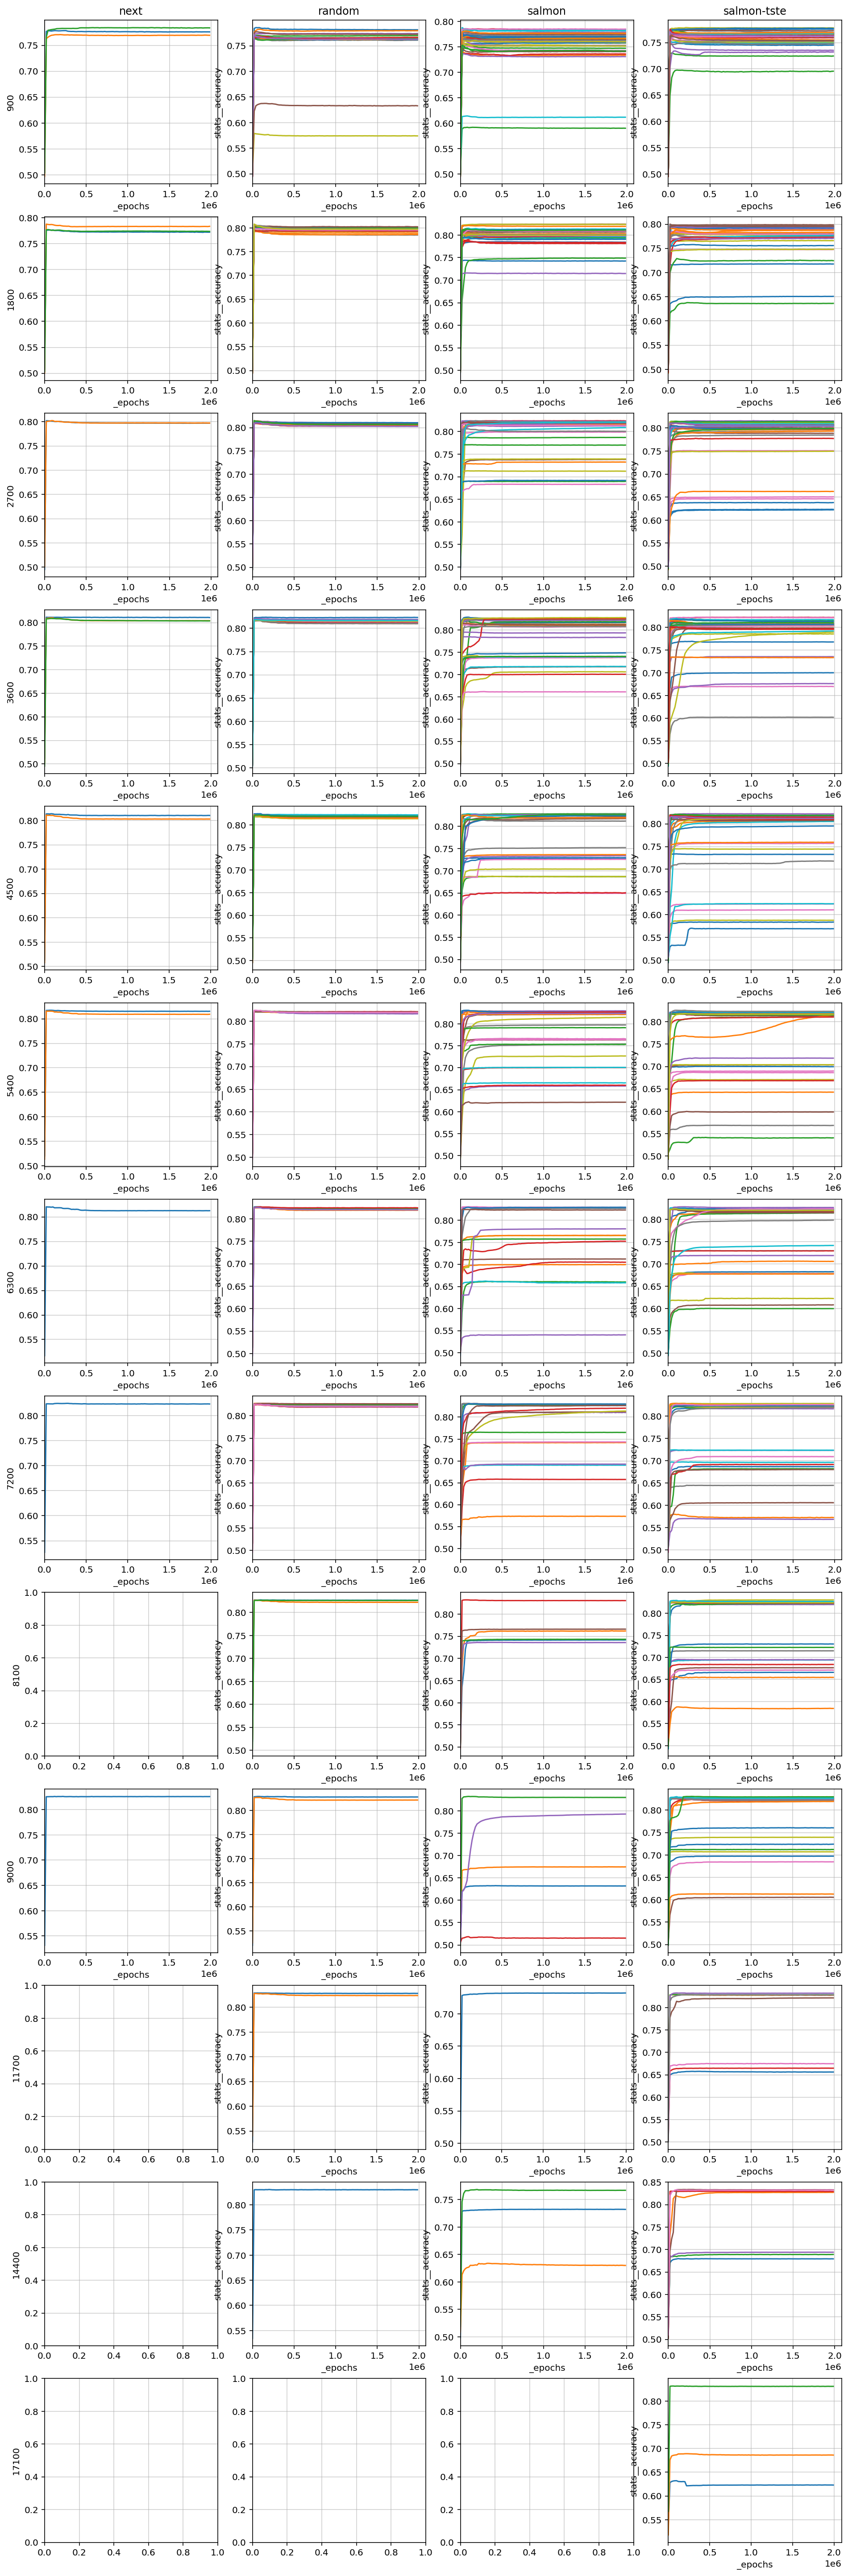

In [64]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pprint import pprint

w = 5
cmap = cm.viridis

N_TRAIN = list(sorted(list({s["meta"]["n_train"] for s in show})))
SAMPLERS = list(sorted(list({o["meta"]["sampling"] for o in out})))
N_ROWS = len(N_TRAIN)
N_COLS = len(SAMPLERS)
# print(hue_order)

w = 4
fig, axs = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(N_COLS * w, N_ROWS * w))

for ax, sampler in zip(axs[0], SAMPLERS):
    _ = ax.set_title(sampler)
for row, n_train in zip(axs, N_TRAIN):
    _ = row[0].set_ylabel(n_train)
    for ax, sampler in zip(row, SAMPLERS):
        __show = [o for o in show if o["meta"]["sampling"] == sampler and o["meta"]["n_train"] == n_train]
        for k, m in enumerate(__show):
#             if m["meta"]["meta__alg"] == "ARR" and "n_search=35" not in m["meta"]["meta__fname"]:
#                 continue
            y = "stats__accuracy"
            df = pd.DataFrame(m["history"])
            df[f"{y}__diff"] = df[y] - df.iloc[-1][y]
            ax = sns.lineplot(
                x="_epochs",
                y=y,
#                 y=f"{y}__diff",
                data=df,
                ax=ax,
#                 color=cmap(k / (max(1, len(hue_order) - 1))),
                label=_get_meta(m["meta"].get("meta__fname", "random"))
            )
        _ = ax.grid(alpha=0.6)
        _ = ax.set_xlim(0, None)
        eps = 0.04
#         _ = ax.set_ylim(-eps / 2, eps / 2)
        if hasattr(ax, "legend_") and ax.legend_ is not None:
            _ = ax.legend_.remove()


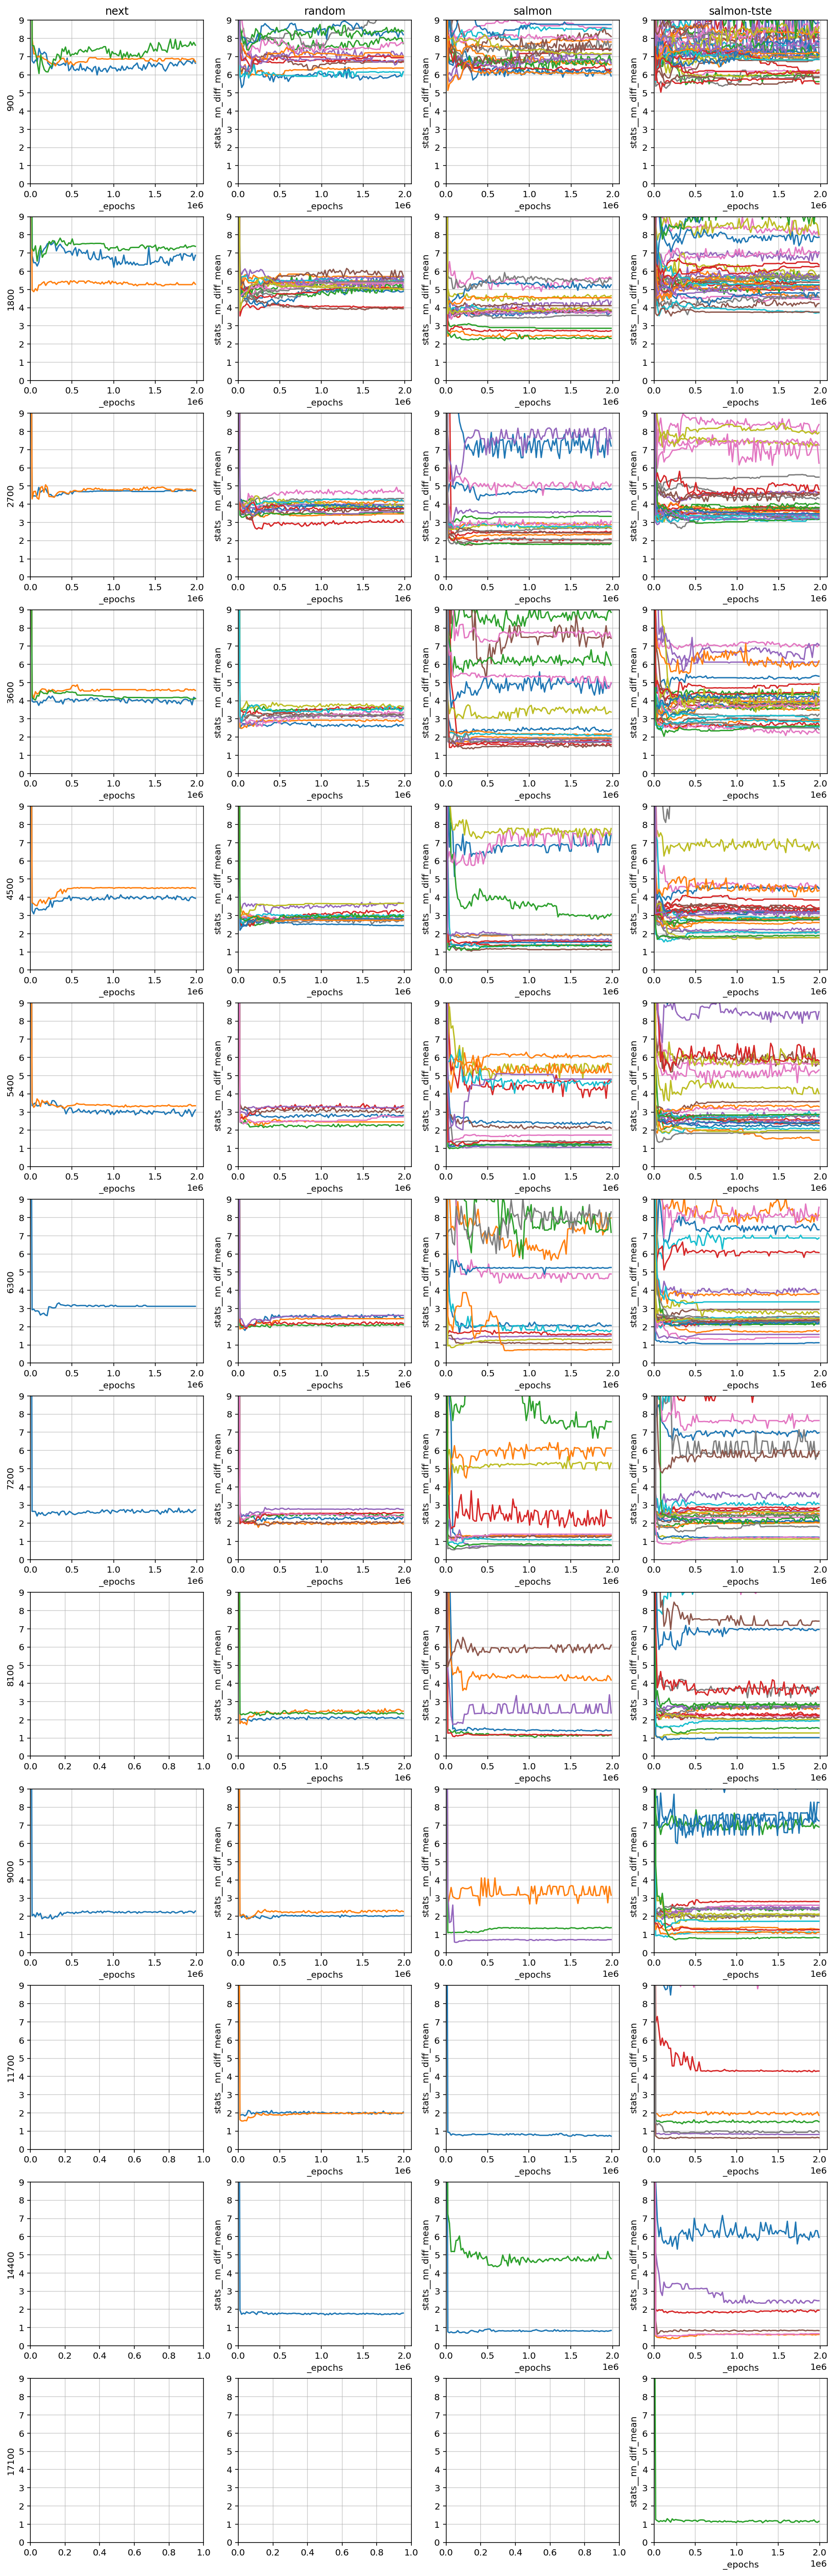

In [67]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pprint import pprint

w = 5
cmap = cm.viridis

N_TRAIN = list(sorted(list({s["meta"]["n_train"] for s in show})))
SAMPLERS = list(sorted(list({o["meta"]["sampling"] for o in show})))
N_ROWS = len(N_TRAIN)
N_COLS = len(SAMPLERS)
# print(hue_order)

w = 4
fig, axs = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(N_COLS * w, N_ROWS * w))

for ax, sampler in zip(axs[0], SAMPLERS):
    _ = ax.set_title(sampler)
for row, n_train in zip(axs, N_TRAIN):
    _ = row[0].set_ylabel(n_train)
    for ax, sampler in zip(row, SAMPLERS):
        __show = [o for o in show if o["meta"]["sampling"] == sampler and o["meta"]["n_train"] == n_train]
        for k, m in enumerate(__show):
            if m["meta"]["meta__alg"] == "ARR":
#                 good = "n_search=35" in m["meta"]["meta__fname"]
                good = "n_top=1-" in m["meta"]["meta__fname"]
                if not good:
                    continue
                
            label = m["meta"].get("meta__fname", "random").split("/")[-1]
            label = label.replace("ARR-n_search=352440-n_top=", "")
            label = label.replace("-1_responses.csv.zip", "")
            y = "stats__nn_diff_mean"
            df = pd.DataFrame(m["history"])
            df[f"{y}__diff"] = df[y] - df.iloc[-1][y]
            ax = sns.lineplot(
                x="_epochs",
                y=y,#}__diff",
#                 y=f"{y}__diff",
                data=df,
                ax=ax,
#                 color=cmap(k / (max(1, len(hue_order) - 1))),
                label=label,
            )
        _ = ax.grid(alpha=0.6)
        _ = ax.set_xlim(0, None)
        eps = 9
#         _ = ax.set_ylim(-eps/2, eps/2)
        _ = ax.set_ylim(0, 9)
        if hasattr(ax, "legend_") and ax.legend_ is not None:
            _ = ax.legend_.remove()

n_top=1, n_search=full, nm="arr, n_ans==3600, d=2, nm=CKL

In [ ]:
out[2]["meta"]

In [ ]:
__d = [
    o
    for o in out
    if "n_search=352440-n_top=1-" in o["meta"]["meta__fname"]
    and o["meta"]["d"] == 1
    and o["meta"]["noise_model"] == "CKL"
    and o["meta"]["len_X_train"] == 3600
]
print(len(__d))
for k in __d[0]['meta'].keys():
    v = [_["meta"][k] for _ in __d]
    print(k, v)
assert len(__d) == 1
__s = __d[0]

In [ ]:
import altair as alt
import numpy as np

em = np.asarray(__s["embedding"])
assert em.ndim == 2
if em.shape[1] == 1:
    em = np.hstack((em, em))
    em[:, 1] += 2 * np.random.uniform(size=len(em))
print(em.shape)
__t = pd.DataFrame(em, columns=["x", "y"])
__t["smoothness"] = np.linspace(0, 1, num=len(__t))
alt.Chart(__t).mark_circle(size=500).encode(
    x="x",
    y="y",
    color=alt.Color("smoothness", scale=alt.Scale(scheme='turbo')),
)